In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Simulate Sensor Dataset
# Features: [Moisture, Temp, Humidity, Sunlight_Hours, Nitrogen]
data = {
    'moisture': np.random.uniform(20, 80, 200),
    'temp': np.random.uniform(15, 35, 200),
    'humidity': np.random.uniform(40, 90, 200),
    'sunlight': np.random.uniform(5, 12, 200),
    'nitrogen': np.random.uniform(10, 50, 200),
    'yield_kg': [] # To be calculated
}

# Create a target variable (Yield) based on a simple formula + noise
data['yield_kg'] = (data['moisture'] * 0.4) + (data['sunlight'] * 2.5) + np.random.normal(0, 2, 200)

df = pd.DataFrame(data)

# 2. Train AI Model
X = df.drop('yield_kg', axis=1)
y = df['yield_kg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Using Random Forest (Excellent for tabular IoT sensor data)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# 3. Simulate a Real-time Prediction
current_sensors = np.array([[45.5, 28.0, 65.0, 10.5, 30.0]]) # Current sensor readings
prediction = model.predict(current_sensors)

print(f"Predicted Crop Yield: {prediction[0]:.2f} kg per plot")

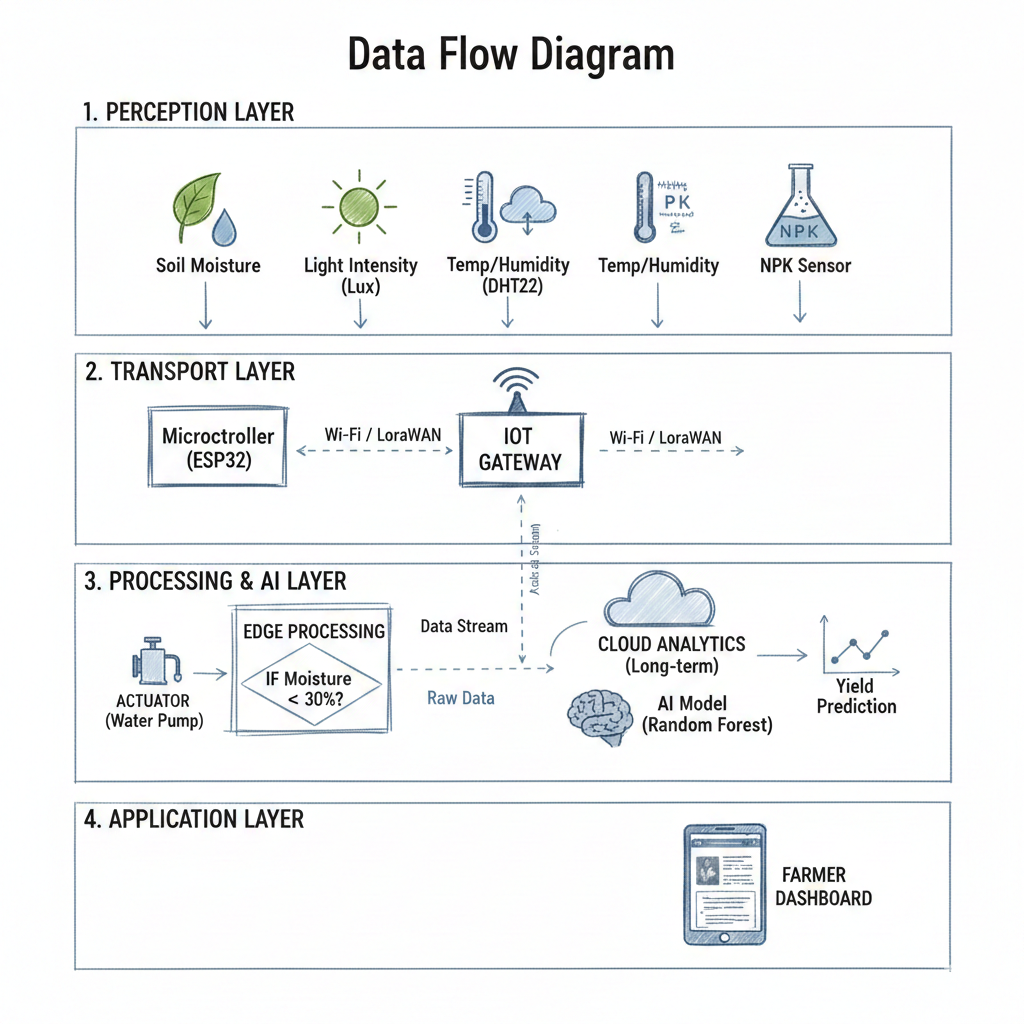


**AI Model Used: Random Forest Regressor.**

Why? It handles non-linear relationships between variables (like how too much heat can ruin the benefit of good moisture) better than simple linear regression.

Integration: The AI processing can happen at the Edge (on the Gateway) for immediate irrigation or in the Cloud for long-term yield trends.
